In [1]:
print("all ok")

all ok


In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
from langchain_groq import ChatGroq

In [4]:
llm=ChatGroq(model_name="deepseek-r1-distill-llama-70b")

In [5]:
llm.invoke("What is the capital of France?")

AIMessage(content='<think>\n\n</think>\n\nThe capital of France is Paris.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 10, 'total_tokens': 22, 'completion_time': 0.046671722, 'prompt_time': 0.000196335, 'queue_time': 0.273293544, 'total_time': 0.046868057}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_e98d30d035', 'finish_reason': 'stop', 'logprobs': None}, id='run--1cbdd6b6-b262-4ebe-9839-46bdabed441c-0', usage_metadata={'input_tokens': 10, 'output_tokens': 12, 'total_tokens': 22})

In [6]:
from langchain_core.tools import tool

In [7]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [8]:
@tool
def multiply(x: int, y: int) -> int:
    """Multiplies two numbers."""
    return x * y

In [9]:
multiply({"x":2, "y":3})

C:\Users\sunny\AppData\Local\Temp\ipykernel_87612\4161870413.py:1: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  multiply({"x":2, "y":3})


6

In [10]:
@tool
def search(query: str):
    """search the web for a query and return the results"""
    tavily=TavilySearchResults()
    result=tavily.invoke(query)
    return f"Result for {query} is: \n{result}"
    

In [11]:
print(search.invoke({"query":"What is the capital of France?"}))

Result for What is the capital of France? is: 
[{'title': 'What is the Capital of France? - Mappr', 'url': 'https://www.mappr.co/capital-cities/france/', 'content': 'mappr logo\nmappr logo\n\nHome » Capital Cities » What is the Capital of France?\n\n# What is the Capital of France?\n\nParis is the capital of France. Also known as the “City of Light,” is not only the capital but also the most populous city of France. Paris is renowned globally for its art, fashion, gastronomy, and culture.\n\nA map showing France in yellow with surrounding countries in white, major cities marked, and Paris highlighted with a black dot. [...] However, Paris only became the official capital of France during the reign of Clovis I, in the late 5th and early 6th century. Before Clovis, the Merovingian kings did not rule from a fixed capital, but Clovis established his court in Paris, effectively making it the capital. Since then, with some interruptions, Paris has remained the capital of France. [...] The Pa

In [12]:
tools = [multiply, search]

In [13]:
tools

[StructuredTool(name='multiply', description='Multiplies two numbers.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x0000025AB68CB5B0>),
 StructuredTool(name='search', description='search the web for a query and return the results', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000025AB68C8AF0>)]

In [14]:
llm_with_tools=llm.bind_tools(tools)

In [16]:
result=llm_with_tools.invoke("what is current gdp of india?")

In [17]:
result.content

''

In [ ]:
result.tool_calls

[{'name': 'search',
  'args': {'query': 'current GDP of India'},
  'id': '9h9hp280y',
  'type': 'tool_call'}]

In [24]:
result.tool_calls[0]["name"]

'search'

In [25]:
result.tool_calls[0]["args"]

{'query': 'current GDP of India'}

In [26]:
type(result.tool_calls[0]["args"])

dict

In [19]:
tool_mapping={tool.name:tool for tool in tools}

In [20]:
tool_mapping

{'multiply': StructuredTool(name='multiply', description='Multiplies two numbers.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x0000025AB68CB5B0>),
 'search': StructuredTool(name='search', description='search the web for a query and return the results', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000025AB68C8AF0>)}

In [21]:
tool_mapping["search"]

StructuredTool(name='search', description='search the web for a query and return the results', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000025AB68C8AF0>)

In [ ]:
#manually i am passing here
# tool_mapping["search"].invoke({"query":"What is the capital of india?"})

'Result for What is the capital of india? is: \n[{\'title\': \'What is the capital of India? States and union territories explained.\', \'url\': \'https://www.usatoday.com/story/news/world/2023/05/24/what-is-the-capital-of-india/70195720007/\', \'content\': \'Want to learn more about the soon-to-be most populous country? Here’s some interesting information about how India is organized.\\n\\n## What is the capital of India?\\n\\nThe capital of India is New Delhi, located in the north-central part of the country to the west of the Yamuna River.\\n\\nCalcutta (now Kolkata, the capital of West Bengal) was the country’s capital until 1911 when King George V declared Delhi the new capital and construction of New Delhi began. [...] When the national government achieved independence in 1947, New Delhi became the capital.\\n\\nMumbai, the state capital of Maharashtra, is often considered the financial capital of India because of its role in the national and international economy.\\n\\n## How ma

In [ ]:

tool_mapping[result.tool_calls[0]["name"]].invoke(result.tool_calls[0]["args"])

'Result for current GDP of India is: \n[{\'title\': \'India - GDP, PPP (current International $) - 2025 Data 2026 Forecast ...\', \'url\': \'https://tradingeconomics.com/india/gdp-ppp-us-dollar-wb-data.html\', \'content\': \'GDP, PPP (current international $) in India was reported at 14619765554295 USD in 2023, according to the World Bank collection of development indicators, compiled from officially recognized sources. India - GDP, PPP (current international $) - actual values, historical data, forecasts and projections were sourced from the World Bank on June of 2025.\', \'score\': 0.8800674}, {\'title\': "India To Overtake Japan As World\'s 4th Largest Economy In 2025: IMF ...", \'url\': \'https://pwonlyias.com/current-affairs/indias-economic-growth/\', \'content\': "India is projected to become the world\'s fourth-largest economy in 2025 by nominal GDP, surpassing Japan, according to IMF estimates. Current Status of Indian Economy According to the International Monetary Fund (IMF),

In [28]:
from typing import TypedDict, Sequence, Annotated

In [29]:
import operator

In [30]:
from langchain_core.messages import BaseMessage

In [31]:
class AgentState(TypedDict):
    """State for the agent."""
    messages: Annotated[Sequence[BaseMessage],operator.add]

In [ ]:
# state={"messages":["hi","hello","how are you?"]}

In [46]:
def invoke_model(state:AgentState):
    messages=state["messages"]
    question=messages[-1]
    response=llm_with_tools.invoke(question)
    return {"messages":[response]}
    

In [ ]:
def router(state:AgentState):
    tool_calls=state["messages"][-1].tool_calls
    if len(tool_calls)>0:
        return "tool" #key name
    else:
        return "end" #key name

In [59]:
def invoke_tool(state:AgentState):
    tool_details=state["messages"][-1].tool_calls
    
    if tool_details is None:
        return Exception("No tool calls found in the last message.")
    
    print(f"Seleted tool: {tool_details[0]['name']}")
    
    if tool_details[0]["name"]=="search":
        response=input(prompt=f"[yes/no] do you want to continue with this expensive web search")
        if response.lower()=="no":
            print("web search discarded by the user. exiting gracefully")
            raise Exception("Web search discarded by the user.")
            
    
    response=tool_mapping[tool_details[0]["name"]].invoke(tool_details[0]["args"])
    return {"messages":[response]}
            
    
    

In [60]:
tools

[StructuredTool(name='multiply', description='Multiplies two numbers.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x0000025AB68CB5B0>),
 StructuredTool(name='search', description='search the web for a query and return the results', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000025AB68C8AF0>)]

for which tool money might be requied: search tool

should we take pemission from human(user) before proceding with the taviley tool call?

In [61]:
from langgraph.graph import StateGraph, START,END

In [62]:
graph=StateGraph(AgentState)

In [63]:
graph.add_node("ai_assistant", invoke_model)

##### eariler we were using the tool node from list of tool
##### but now we have crate tool invoke(custom funtion)
##### why we are doing it: as a user if we want to take a authority to which i need to give permission for execution 

In [64]:
graph.add_node("tool", invoke_tool)

In [ ]:
graph.add_conditional_edges("ai_assistant",
                            router,
                            {
                                "tool":"tool", ##with the key tool which value is associated <tool>
                                "end":END
                            }
                            )

In [66]:
graph.add_edge("tool", END)

In [67]:
graph.set_entry_point("ai_assistant")

In [68]:
app=graph.compile()

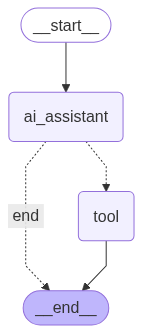

In [69]:

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [70]:
app.invoke({"messages":["What is the current gdp of the india?"]})

Seleted tool: search


{'messages': ['What is the current gdp of the india?',
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '4q0mzt88h', 'function': {'arguments': '{"query":"current GDP of India"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 124, 'prompt_tokens': 176, 'total_tokens': 300, 'completion_time': 0.501417045, 'prompt_time': 0.010997096, 'queue_time': 0.052522031, 'total_time': 0.512414141}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--1a7421ad-ce70-45f7-9b5f-6996af8fe791-0', tool_calls=[{'name': 'search', 'args': {'query': 'current GDP of India'}, 'id': '4q0mzt88h', 'type': 'tool_call'}], usage_metadata={'input_tokens': 176, 'output_tokens': 124, 'total_tokens': 300}),
  'Result for current GDP of India is: \n[{\'title\': "India To Overtake Japan As World\'s 4th Largest Economy In 2025: IMF ...", \'url\': \'https://pwonlyias.c

In [71]:
app.invoke({"messages":["What is the multiplication of 5 and 20?"]})

Seleted tool: multiply


{'messages': ['What is the multiplication of 5 and 20?',
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'fhqr2zxfh', 'function': {'arguments': '{"x":5,"y":20}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 189, 'prompt_tokens': 177, 'total_tokens': 366, 'completion_time': 0.748217443, 'prompt_time': 0.011103573, 'queue_time': 0.071498198, 'total_time': 0.759321016}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--fc981f4d-1f25-4294-8358-5a5c8ebe2de0-0', tool_calls=[{'name': 'multiply', 'args': {'x': 5, 'y': 20}, 'id': 'fhqr2zxfh', 'type': 'tool_call'}], usage_metadata={'input_tokens': 177, 'output_tokens': 189, 'total_tokens': 366}),
  100]}

In [72]:
app.invoke({"messages":["What is the current weather in india delhi?"]})

Seleted tool: search
web search discarded by the user. exiting gracefully


Exception: Web search discarded by the user.

In [73]:
app.invoke({"messages":["what is a latest news of bengaluru?"]})

Seleted tool: search


{'messages': ['what is a latest news of bengaluru?',
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'tazb6dhs8', 'function': {'arguments': '{"query":"Bengaluru latest news"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 112, 'prompt_tokens': 177, 'total_tokens': 289, 'completion_time': 0.486075203, 'prompt_time': 0.018451055, 'queue_time': 0.054526525, 'total_time': 0.504526258}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--a8e93771-f07f-419b-b0e9-df5da33cee49-0', tool_calls=[{'name': 'search', 'args': {'query': 'Bengaluru latest news'}, 'id': 'tazb6dhs8', 'type': 'tool_call'}], usage_metadata={'input_tokens': 177, 'output_tokens': 112, 'total_tokens': 289}),
  'Result for Bengaluru latest news is: \n[{\'title\': "Bengaluru News Updates: Key Developments from Karnataka\'s Capital", \'url\': \'https://www.thehansindia

In [74]:
app.invoke({"messages":["what is a latest news of delhi?"]})

Seleted tool: search
web search discarded by the user. exiting gracefully


Exception: Web search discarded by the user.

## Langgraph inbuilt human in loop

In [167]:
tools

[StructuredTool(name='multiply', description='Multiplies two numbers.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x0000025AB68CB5B0>),
 StructuredTool(name='search', description='search the web for a query and return the results', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000025AB68C8AF0>)]

In [169]:
from langgraph.prebuilt import ToolNode, tools_condition
tool_node=ToolNode(tools)

In [170]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [171]:
llm_with_tools=llm.bind_tools(tools)

In [172]:
def ai_assistant(state:AgentState):
    response=llm_with_tools.invoke(state["messages"])
    return {"messages":[response]}

In [216]:
from langgraph.checkpoint.memory import MemorySaver

In [217]:
memory=MemorySaver()

In [218]:
graph_builder=StateGraph(AgentState)

In [219]:
graph_builder.add_node("ai_assistant", ai_assistant)

In [220]:
graph_builder.add_node("tools", tool_node)

In [221]:
graph_builder.add_edge(START,"ai_assistant")

In [222]:
graph_builder.add_conditional_edges("ai_assistant",
                                    tools_condition,
                                    )

In [223]:
graph_builder.add_edge("tools", "ai_assistant")

In [224]:
app2=graph_builder.compile(checkpointer=memory,interrupt_before=["tools"])

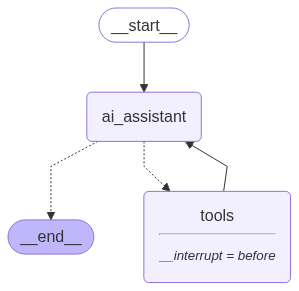

In [225]:

from IPython.display import Image, display
display(Image(app2.get_graph().draw_mermaid_png()))

In [226]:
config={"configurable":{"thread_id":"1"}}

In [227]:
from langchain_core.messages import HumanMessage
response=app2.invoke({"messages":[HumanMessage("What is the current gdp of the china?")]},config=config)

In [228]:
response

{'messages': [HumanMessage(content='What is the current gdp of the china?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'nmmwmjaqc', 'function': {'arguments': '{"query":"current GDP of China"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 149, 'prompt_tokens': 176, 'total_tokens': 325, 'completion_time': 0.609416334, 'prompt_time': 0.01099666, 'queue_time': 0.05363433, 'total_time': 0.620412994}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--35ca1cc3-7893-40af-b047-adfd3d49ee23-0', tool_calls=[{'name': 'search', 'args': {'query': 'current GDP of China'}, 'id': 'nmmwmjaqc', 'type': 'tool_call'}], usage_metadata={'input_tokens': 176, 'output_tokens': 149, 'total_tokens': 325})]}

In [229]:
snapshot=app2.get_state(config)

In [230]:
snapshot

StateSnapshot(values={'messages': [HumanMessage(content='What is the current gdp of the china?', additional_kwargs={}, response_metadata={}), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'nmmwmjaqc', 'function': {'arguments': '{"query":"current GDP of China"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 149, 'prompt_tokens': 176, 'total_tokens': 325, 'completion_time': 0.609416334, 'prompt_time': 0.01099666, 'queue_time': 0.05363433, 'total_time': 0.620412994}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--35ca1cc3-7893-40af-b047-adfd3d49ee23-0', tool_calls=[{'name': 'search', 'args': {'query': 'current GDP of China'}, 'id': 'nmmwmjaqc', 'type': 'tool_call'}], usage_metadata={'input_tokens': 176, 'output_tokens': 149, 'total_tokens': 325})]}, next=('tools',), config={'configurable': {'thread_id': '1', 'checkpoint_ns'

In [231]:
snapshot.next

('tools',)

In [232]:
last_message=snapshot.values["messages"][-1]

In [233]:
last_message

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'nmmwmjaqc', 'function': {'arguments': '{"query":"current GDP of China"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 149, 'prompt_tokens': 176, 'total_tokens': 325, 'completion_time': 0.609416334, 'prompt_time': 0.01099666, 'queue_time': 0.05363433, 'total_time': 0.620412994}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--35ca1cc3-7893-40af-b047-adfd3d49ee23-0', tool_calls=[{'name': 'search', 'args': {'query': 'current GDP of China'}, 'id': 'nmmwmjaqc', 'type': 'tool_call'}], usage_metadata={'input_tokens': 176, 'output_tokens': 149, 'total_tokens': 325})

In [234]:
tool_details=last_message.tool_calls

In [235]:
tool_details

[{'name': 'search',
  'args': {'query': 'current GDP of China'},
  'id': 'nmmwmjaqc',
  'type': 'tool_call'}]

In [236]:
tool_details[0]["name"]

'search'

In [237]:
if tool_details[0]["name"]== "search":
    user_input=input(prompt=f"[yes/no] do you want to continue with {tool_details[0]['name']}?").lower()
    if user_input=="no":
        print("web tool discarded")
        raise Exception("Web tool discarded by the user.")
    else:
        response=app2.invoke(None,config)
        print(response)
else:
    response=app2.invoke(None,config)
    print(response)

{'messages': [HumanMessage(content='What is the current gdp of the china?', additional_kwargs={}, response_metadata={}), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'nmmwmjaqc', 'function': {'arguments': '{"query":"current GDP of China"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 149, 'prompt_tokens': 176, 'total_tokens': 325, 'completion_time': 0.609416334, 'prompt_time': 0.01099666, 'queue_time': 0.05363433, 'total_time': 0.620412994}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--35ca1cc3-7893-40af-b047-adfd3d49ee23-0', tool_calls=[{'name': 'search', 'args': {'query': 'current GDP of China'}, 'id': 'nmmwmjaqc', 'type': 'tool_call'}], usage_metadata={'input_tokens': 176, 'output_tokens': 149, 'total_tokens': 325}), ToolMessage(content="Result for current GDP of China is: \n[{'title': 'China GDP - Worldometer', '

In [ ]:
{'messages': [HumanMessage(content='What is the current gdp of the china?', additional_kwargs={}, response_metadata={}), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'nmmwmjaqc', 'function': {'arguments': '{"query":"current GDP of China"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 149, 'prompt_tokens': 176, 'total_tokens': 325, 'completion_time': 0.609416334, 'prompt_time': 0.01099666, 'queue_time': 0.05363433, 'total_time': 0.620412994}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--35ca1cc3-7893-40af-b047-adfd3d49ee23-0', tool_calls=[{'name': 'search', 'args': {'query': 'current GDP of China'}, 'id': 'nmmwmjaqc', 'type': 'tool_call'}], usage_metadata={'input_tokens': 176, 'output_tokens': 149, 'total_tokens': 325}), ToolMessage(content="Result for current GDP of China is: \n[{'title': 'China GDP - Worldometer', 'url': 'https://www.worldometers.info/gdp/china-gdp/', 'content': 'Nominal (current) Gross Domestic Product (GDP) of China is $17,794,800,000,000 (USD) as of 2023. · Real GDP (constant, inflation adjusted) of China reached', 'score': 0.92507464}, {'title': 'China: GDP at current prices 1985-2030 - Statista', 'url': 'https://www.statista.com/statistics/263770/gross-domestic-product-gdp-of-china/', 'content': 'In 2024, the gross domestic product (GDP) of China amounted to around 18.7 trillion U.S. dollars. In comparison to the GDP of the other BRIC', 'score': 0.87113565}, {'title': 'China GDP - Trading Economics', 'url': 'https://tradingeconomics.com/china/gdp', 'content': '##### Members\\n\\n##### \\n\\n# China GDP\\n\\n## The Gross Domestic Product (GDP) in China was worth 17794.78 billion US dollars in 2023, according to official data from the World Bank. The GDP value of China represents 16.88 percent of the world economy. source: World Bank [...] ### GDP in China is expected to reach 18542.00 USD Billion by the end of 2025, according to Trading Economics global macro models and analysts expectations. In the long-term, the China GDP is projected to trend around 19284.00 USD Billion in 2026 and 20094.00 USD Billion in 2027, according to our econometric models. [...] | Related | Last | Previous | Unit | Reference |\\n| --- | --- | --- | --- | --- |\\n| Full Year GDP Growth | 5.00 | 5.40 | percent | Dec 2024 |\\n| GDP | 17794.78 | 17881.78 | USD Billion | Dec 2023 |\\n| GDP Growth Rate YoY | 5.40 | 5.40 | percent | Mar 2025 |\\n| GDP Growth Rate | 1.20 | 1.60 | percent | Mar 2025 |\\n| GDP per Capita | 12175.20 | 11555.93 | USD | Dec 2023 |\\n| GDP per Capita PPP | 22137.60 | 21011.62 | USD | Dec 2023 |', 'score': 0.8690161}, {'title': 'China GDP | Historical Chart & Data - Macrotrends', 'url': 'https://www.macrotrends.net/global-metrics/countries/chn/china/gdp-gross-domestic-product', 'content': 'China GDP for 2023 was 17.795 trillion US dollars, a 0.49% decline from 2022. · China GDP for 2022 was 17.882 trillion US dollars, a 0.34% increase from 2021.', 'score': 0.8282873}, {'title': 'National Bureau of Statistics of China - National Data', 'url': 'https://data.stats.gov.cn/english/easyquery.htm?cn=B01', 'content': '4Q 2023 ; Gross Domestic Product, Current Quarter(100 million yuan), 318758.0, 373726.2, 341758.0, 328837.6 ; Gross Domestic Product, Accumulated(100 million yuan)', 'score': 0.81770587}]", name='search', tool_call_id='nmmwmjaqc'), AIMessage(content='The current GDP of China is approximately **$17.7 trillion USD** as of 2023, according to data from Worldometer and Trading Economics. This represents about **16.88% of the world economy**. For more detailed and up-to-date information, you can refer to sources like Worldometer, Statista, or Trading Economics.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 324, 'prompt_tokens': 997, 'total_tokens': 1321, 'completion_time': 1.523101661, 'prompt_time': 0.084892204, 'queue_time': 0.057106376000000014, 'total_time': 1.607993865}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--945b4539-2780-4c57-b5ac-3f3d89e15325-0', usage_metadata={'input_tokens': 997, 'output_tokens': 324, 'total_tokens': 1321})]}

In [142]:
app2.invoke(None,config) #none means resume the last state or resume the process

{'messages': [HumanMessage(content='What is the current gdp of the china?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'ww7esp5pk', 'function': {'arguments': '{"query":"current GDP of China"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 213, 'prompt_tokens': 176, 'total_tokens': 389, 'completion_time': 0.930818273, 'prompt_time': 0.010999858, 'queue_time': 0.053654162000000005, 'total_time': 0.941818131}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--7bd5c3d6-3431-471e-bfb4-9178f5b86494-0', tool_calls=[{'name': 'search', 'args': {'query': 'current GDP of China'}, 'id': 'ww7esp5pk', 'type': 'tool_call'}], usage_metadata={'input_tokens': 176, 'output_tokens': 213, 'total_tokens': 389}),
  ToolMessage(content='Result for current GDP of China is: \n[{\'title\': \'China: GD

In [238]:
response=app2.invoke({"messages":[HumanMessage("What is the current gdp of the japan?")]},config=config)

In [239]:
response

{'messages': [HumanMessage(content='What is the current gdp of the china?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'nmmwmjaqc', 'function': {'arguments': '{"query":"current GDP of China"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 149, 'prompt_tokens': 176, 'total_tokens': 325, 'completion_time': 0.609416334, 'prompt_time': 0.01099666, 'queue_time': 0.05363433, 'total_time': 0.620412994}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--35ca1cc3-7893-40af-b047-adfd3d49ee23-0', tool_calls=[{'name': 'search', 'args': {'query': 'current GDP of China'}, 'id': 'nmmwmjaqc', 'type': 'tool_call'}], usage_metadata={'input_tokens': 176, 'output_tokens': 149, 'total_tokens': 325}),
  ToolMessage(content="Result for current GDP of China is: \n[{'title': 'China GDP - Worldometer

In [240]:
snapshot=app2.get_state(config)

In [241]:
snapshot.next

('tools',)

In [242]:
last_message=snapshot.values["messages"][-1]

In [243]:
last_message.tool_calls

[{'name': 'search',
  'args': {'query': 'current GDP of Japan'},
  'id': 'hadyq87px',
  'type': 'tool_call'}]

In [244]:
tool_call_id=last_message.tool_calls[0]["id"]

In [245]:
tool_call_id

'hadyq87px'

In [246]:
from langchain_core.messages import AIMessage,ToolMessage

In [251]:
new_message=[
    ToolMessage(content="according to the latest data 4.1 trillion USD",tool_call_id=tool_call_id),
    AIMessage(content="GDP is 4.1 Trillion USD.")
    
]

In [252]:
app2.update_state(config, 
                  {
                      "messages":new_message
                   }
                  )

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f054ac8-de71-6fef-8008-77e11b5319fd'}}

In [253]:
app2.get_state(config).values["messages"][-1]

AIMessage(content='GDP is 4.1 Trillion USD.', additional_kwargs={}, response_metadata={})

In [254]:
app2.invoke(None,config=config)

{'messages': [HumanMessage(content='What is the current gdp of the china?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'nmmwmjaqc', 'function': {'arguments': '{"query":"current GDP of China"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 149, 'prompt_tokens': 176, 'total_tokens': 325, 'completion_time': 0.609416334, 'prompt_time': 0.01099666, 'queue_time': 0.05363433, 'total_time': 0.620412994}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--35ca1cc3-7893-40af-b047-adfd3d49ee23-0', tool_calls=[{'name': 'search', 'args': {'query': 'current GDP of China'}, 'id': 'nmmwmjaqc', 'type': 'tool_call'}], usage_metadata={'input_tokens': 176, 'output_tokens': 149, 'total_tokens': 325}),
  ToolMessage(content="Result for current GDP of China is: \n[{'title': 'China GDP - Worldometer

In [255]:
app2.invoke({"messages":[HumanMessage("What is the current gdp of the japan?")]},config=config)

{'messages': [HumanMessage(content='What is the current gdp of the china?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'nmmwmjaqc', 'function': {'arguments': '{"query":"current GDP of China"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 149, 'prompt_tokens': 176, 'total_tokens': 325, 'completion_time': 0.609416334, 'prompt_time': 0.01099666, 'queue_time': 0.05363433, 'total_time': 0.620412994}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--35ca1cc3-7893-40af-b047-adfd3d49ee23-0', tool_calls=[{'name': 'search', 'args': {'query': 'current GDP of China'}, 'id': 'nmmwmjaqc', 'type': 'tool_call'}], usage_metadata={'input_tokens': 176, 'output_tokens': 149, 'total_tokens': 325}),
  ToolMessage(content="Result for current GDP of China is: \n[{'title': 'China GDP - Worldometer

Assignment for the multiagent:
deadline till next friday: 11PM

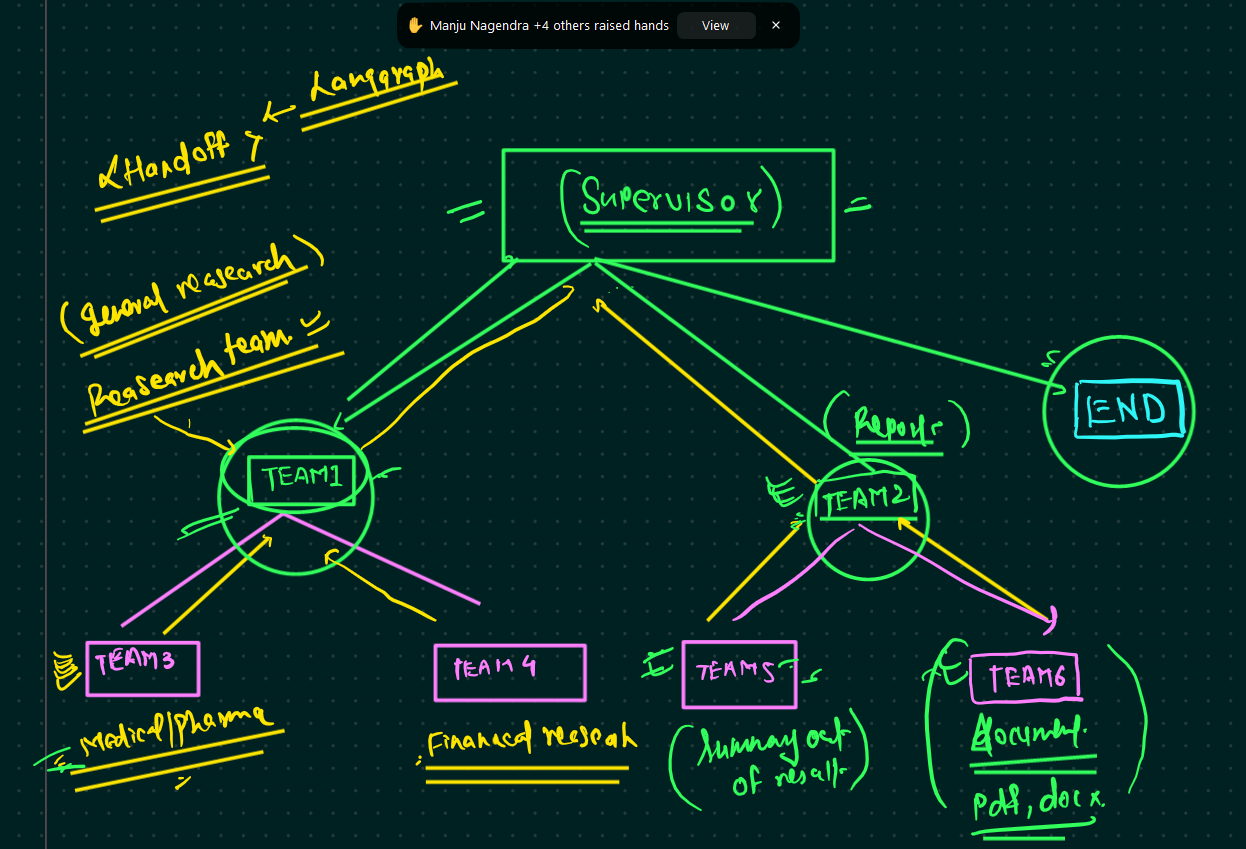

In [ ]:
parallization